# Missing Films
### Highly rated Films that are missing from the Netflix Catalogue

outer merge data sets
  - add merge column

Drop anything without a numerical RT rating

Sort descending on chosen rating

Mark according to merge column (left_only vs both)

Those that are 'left only' but highly rated are missing from Netflix and worth adding/replicating

#### Import Libraries

In [41]:
import pandas as pd
import plotly.express as px
import slugify as slugify

Create DataFrame from Netflix CSV, filtered to just movies

Create DataFrame from Rotten Tomatoes Movies CSV

In [42]:
netflix_movies_df = pd.read_csv('./data/netflix-titles.csv', parse_dates=['date_added'])
netflix_movies_df = netflix_movies_df[netflix_movies_df["type"] == 'Movie']
rotten_movies_df = pd.read_csv('./data/rotten_tomatoes_movies.csv')

Extract release_year from Rotten Tomatoes original_release_date

In [43]:
rotten_movies_df["release_year"] = rotten_movies_df["original_release_date"].str.split('-').str[0]

Add Unique identifier column to both DataFrames for merging

In [44]:
netflix_movies_df["title_and_release_year"] = netflix_movies_df["title"] + " " + netflix_movies_df["release_year"].astype(str)
netflix_movies_df["title_and_release_year"] = netflix_movies_df["title_and_release_year"].apply(slugify.slugify)

rotten_movies_df["title_and_release_year"] = rotten_movies_df["movie_title"] + " " + rotten_movies_df["release_year"].astype(str)
rotten_movies_df["title_and_release_year"] = rotten_movies_df["title_and_release_year"].apply(slugify.slugify)

Merge the above datasets, returning both datasets in one dataframe, combining the rows that overlap ton the unique key generated

In [49]:
netflix_plus_rt_df = pd.merge(netflix_movies_df, rotten_movies_df, how="outer", on="title_and_release_year", indicator=True)

mapping_dict = {
  "left_only": "Netflix",
  "both": "Both",
  "right_only": "Rotten Tomatoes",
}

netflix_plus_rt_df.rename(columns={"_merge":"dataset_location"}, inplace=True)
netflix_plus_rt_df.replace({"dataset_location": mapping_dict}, inplace=True)


In [46]:
netflix_plus_rt_df

,show_id,type,title,director,cast,country,date_added,release_year_x,rating,duration,...,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,release_year_y,dataset_location
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netflix
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021.0,PG,91 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netflix
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993.0,TV-MA,125 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netflix
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021.0,PG-13,104 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netflix
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021.0,TV-MA,127 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netflix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22555,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,22.0,232.0,Spilled,20.0,41745.0,48.0,51.0,181.0,2016,Rotten Tomatoes
22556,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,98.0,291.0,Upright,92.0,101511.0,50.0,285.0,7.0,2016,Rotten Tomatoes
22557,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,80.0,10.0,Upright,86.0,7146.0,0.0,8.0,2.0,1964,Rotten Tomatoes
22558,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,96.0,23.0,Upright,91.0,30193.0,6.0,22.0,1.0,1964,Rotten Tomatoes


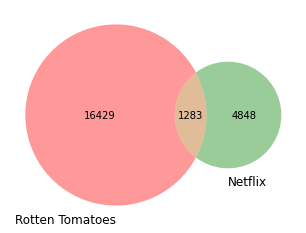

Netflix Only: 4848
Netflix and on Rotten Tomatoes: 1283
Netflix Total: 6131
Not on Netflix: 16429


In [61]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

netflix_count = len(netflix_plus_rt_df[netflix_plus_rt_df["dataset_location"] == "Netflix"])
rotten_tomatoes_count = len(netflix_plus_rt_df[netflix_plus_rt_df["dataset_location"] == "Rotten Tomatoes"])
overlap_count = len(netflix_plus_rt_df[netflix_plus_rt_df["dataset_location"] == "Both"])

missing_from_netflix_df = netflix_plus_rt_df[netflix_plus_rt_df["dataset_location"] == "Rotten Tomatoes"]

# Use the venn2 function
venn2(subsets = (rotten_tomatoes_count, netflix_count, overlap_count), set_labels = ('Rotten Tomatoes', 'Netflix'))
plt.show()

print(f"Netflix Only: {netflix_count}")
print(f"Netflix and on Rotten Tomatoes: {overlap_count}")
print(f"Netflix Total: {netflix_count + overlap_count}")
print(f"Not on Netflix: {rotten_tomatoes_count}")

#### For better merges it would be useful to find out which of the Netflix Only are being missed from the Rotten Tomatoes Only